In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [16]:
#Implementamos la estructura de la NN
class NeuralNet(nn.Module):
    def __init__(self, hidden_size, output_size=1,input_size=1):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.GELU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.GELU()
        self.l3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.GELU()
        self.l4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        out = self.relu3(out)
        out = self.l4(out)
        return out

In [17]:
#Creamos el criterio de la funcion L_Data
criterion = nn.MSELoss()

# Define la funcion de costo y condiciones iniciales
def initial_condition_loss(y, target_value):
    return nn.MSELoss()(y, target_value)

In [56]:
# Vector de tiempo como entrada de la NN
t_numpy = np.arange(-5, 5+0.01, 0.001, dtype=np.float32)
t = torch.from_numpy(t_numpy).reshape(len(t_numpy), 1)
t.requires_grad_(True)


k = 1
r = 1

# Iniciamos las neuronas
model = NeuralNet(hidden_size=256)

# Costo y omptimizador
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# epocas
num_epochs = int(2e3)

# Arrays to store loss values and epochs
loss_values = []
epoch_values = []


In [57]:
for epoch in range(num_epochs):

    
    epsilon = torch.normal(0,0.1, size=(len(t),1)).float()
    t_train = t + epsilon

    # Forward pass
    y_pred = model(t_train)

    # Caalcular la derivada del forward pass
    dy_dt = torch.autograd.grad(y_pred, 
                                t_train, 
                                grad_outputs=torch.ones_like(y_pred), 
                                create_graph=True)[0]
    

    # Funcion física
    loss_DE = criterion(dy_dt - r*y_pred*(1-y_pred/k), torch.zeros_like(dy_dt))

    # Condicion inicial 
    loss_IC = initial_condition_loss(model(torch.tensor([[0.0]])), 
                                     torch.tensor([[0.5]]))
    loss_BCR = initial_condition_loss(model(torch.tensor([[5.0]])), 
                                     torch.tensor([[1.0]]))
    loss_BCL = initial_condition_loss(model(torch.tensor([[-5.0]])), 
                                     torch.tensor([[0.0]]))

    loss = loss_DE + loss_IC + loss_BCR + loss_BCL

    # Backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Guardamos perdidas y epocas
    loss_values.append(loss.item())
    epoch_values.append(epoch)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


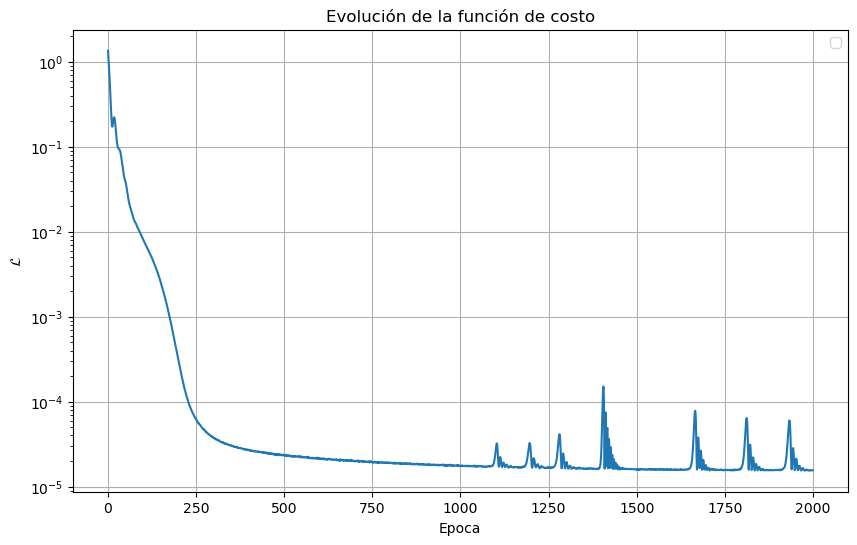

In [58]:

plt.figure(figsize=(10, 6))
plt.plot(epoch_values, loss_values)
plt.xlabel('Epoca')
plt.ylabel(r'$\mathcal{L}$')
plt.title('Evolución de la función de costo')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

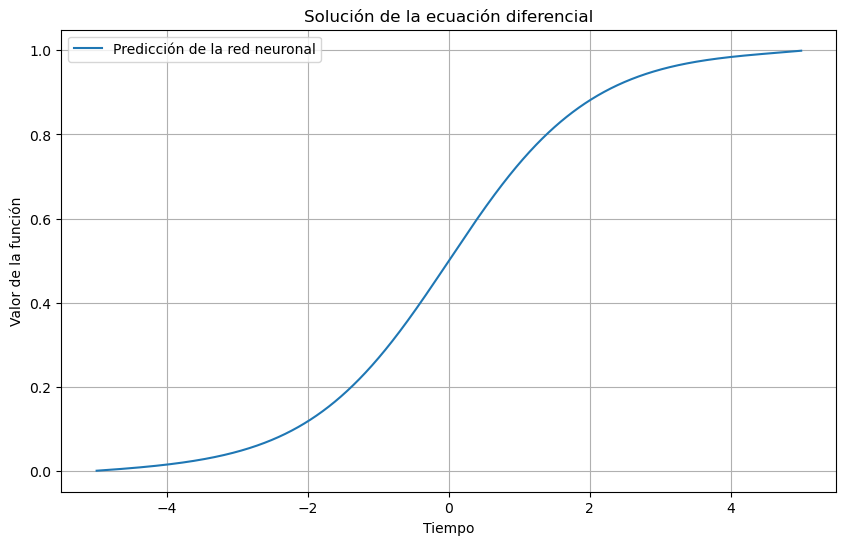

In [59]:
import matplotlib.pyplot as plt

# Genera puntos de tiempo para evaluar la solución
t_test = torch.linspace(-5, 5, 1500).reshape(-1, 1)

# Evalúa la red neuronal en los puntos de tiempo de prueba
with torch.no_grad():
    y_pred_test = model(t_test)

# Gráfica de la solución predicha por la red neuronal
plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), y_pred_test.numpy(), label='Predicción de la red neuronal')
plt.xlabel('Tiempo')
plt.ylabel('Valor de la función')
plt.title('Solución de la ecuación diferencial')
plt.legend()
plt.grid(True)
plt.show()


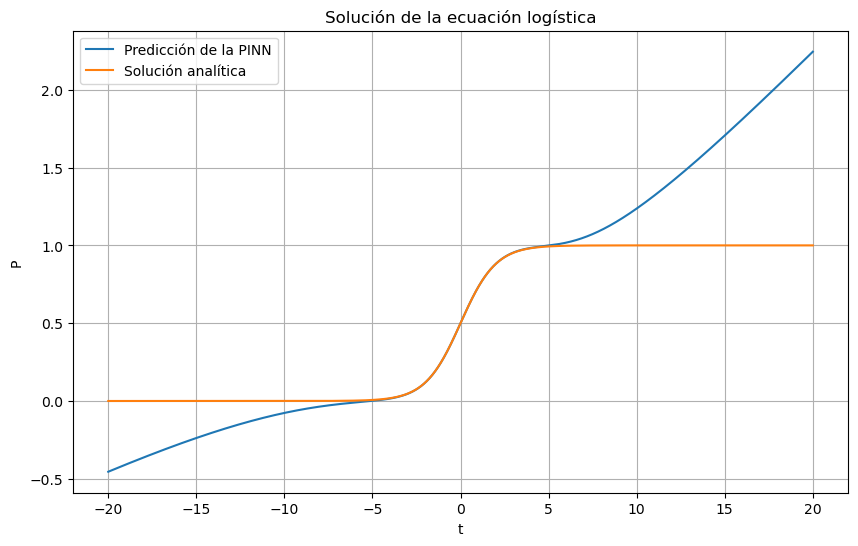

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 1

# Función para la solución analítica
def analytical_solution(t):
    omega = 1/(1+np.exp(-t))
    return omega

# Genera puntos de tiempo para evaluar la solución
t_test = torch.linspace(-20, 20, 2500).reshape(-1, 1)

# Evalúa la red neuronal en los puntos de tiempo de prueba
with torch.no_grad():
    y_pred_test = model(t_test)

# Calcula la solución analítica en los mismos puntos de tiempo
y_analytical = analytical_solution(t_test.numpy())

# Gráfica de la solución predicha por la red neuronal y la solución analítica
plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), y_pred_test.numpy(), label='Predicción de la PINN')
plt.plot(t_test.numpy(), y_analytical, label='Solución analítica')
plt.xlabel('t')
plt.ylabel('P')
plt.title('Solución de la ecuación logística')
plt.legend()
plt.grid(True)
plt.show()


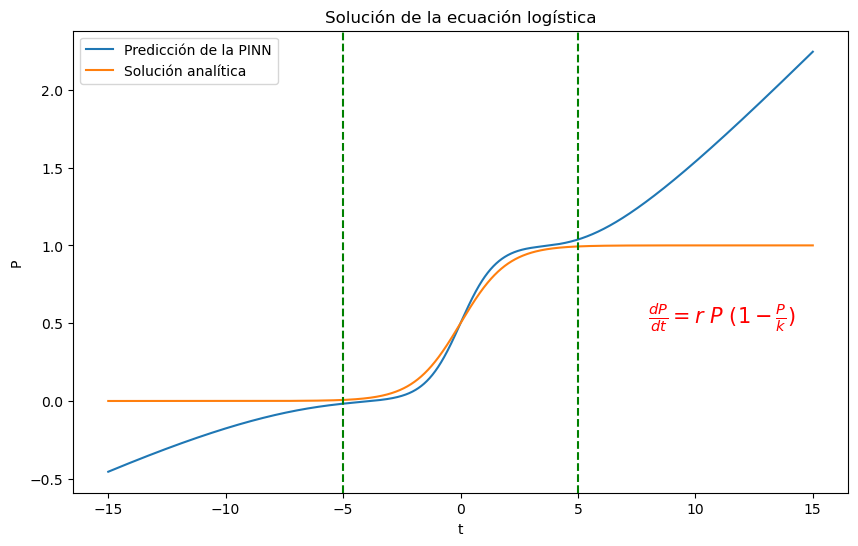

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
k = 1

# Función para la solución analítica
def analytical_solution(t):
    omega = 1/(1+np.exp(-t))
    return omega

# Genera puntos de tiempo para evaluar la solución
t_test = np.linspace(-15, 15, 2500).reshape(-1, 1)


# Calcula la solución analítica en los mismos puntos de tiempo
y_analytical = analytical_solution(t_test)

# Gráfica de la solución predicha por la red neuronal y la solución analítica
plt.figure(figsize=(10, 6))
plt.plot(t_test, y_pred_test, label='Predicción de la PINN')
plt.plot(t_test, y_analytical, label='Solución analítica')
plt.xlabel('t')
plt.ylabel('P')
plt.title('Solución de la ecuación logística')
plt.axvline(x=-5, color='g', linestyle='--')  # Línea vertical en t = -5
plt.axvline(x=5, color='g', linestyle='--' )   # Línea vertical en t = 5
plt.text(8, 0.5, r'$\frac{dP}{dt} = r~P~(1-\frac{P}{k})$', fontsize=15, color='r')
plt.legend()
plt.grid(False)
#plt.savefig('Logistica2.png')

plt.show()

